In [1]:
import json
import gzip
import math
import numpy
from collections import defaultdict
from sklearn import linear_model
import random
import statistics

In [2]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [3]:
answers = {}

In [6]:
# From https://cseweb.ucsd.edu/classes/fa24/cse258-b/files/steam.json.gz
z = gzip.open("steam.json.gz")

In [7]:
dataset = []
for l in z:
    d = eval(l)
    dataset.append(d)

In [8]:
z.close()

In [9]:
### Question 1

In [31]:
dataset[:10]

[{'hours': 0.3,
  'gameID': 'g35322304',
  'hours_transformed': 0.37851162325372983,
  'early_access': False,
  'date': '2015-04-08',
  'text': '+1',
  'userID': 'u55351001'},
 {'userID': 'u70666506',
  'early_access': False,
  'hours': 63.5,
  'hours_transformed': 6.011227255423254,
  'found_funny': 1,
  'text': 'If you want to sit in queue for 10-20min and have 140 ping then this game is perfect for you :)',
  'gameID': 'g49368897',
  'user_id': '76561198030408772',
  'date': '2017-05-20'},
 {'hours': 0.2,
  'gameID': 'g73495588',
  'hours_transformed': 0.2630344058337938,
  'early_access': False,
  'date': '2017-01-27',
  'text': 'I was really not a fan of the gameplay. Games should at least try a little to be enjoyable and not so tedious and boring from the jump. I was just confused and bored, and that is not what I look for in my hobby.',
  'userID': 'u18612571'},
 {'hours': 11.9,
  'text': "Vaas Montenegro is the reason why you should get this game.\nI've never experienced a more

In [41]:
from sklearn.metrics import root_mean_squared_error
def MSE(y, ypred):
    return (root_mean_squared_error(y, ypred)**2).item()

In [42]:
def feat1(d):
    feat = [1, len(d['text'])] 
    return feat  

In [43]:
X = [feat1(d) for d in dataset]
y = [d['hours'] for d in dataset]

In [44]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [46]:
mse1 = MSE(y, model.predict(X))

In [47]:
theta1 = model.coef_[1].item()

In [52]:
answers['Q1'] = [theta1, mse1] # Remember to cast things to float rather than (e.g.) np.float64

In [53]:
assertFloatList(answers['Q1'], 2)

In [54]:
answers['Q1']

[0.0010422806169490823, 75735.70018272947]

In [55]:
### Question 2

In [56]:
dataTrain = dataset[:int(len(dataset)*0.8)]
dataTest = dataset[int(len(dataset)*0.8):]

In [58]:
model2 = linear_model.LinearRegression()
X = [feat1(d) for d in dataTrain]
y = [d['hours'] for d in dataTrain]
model2.fit(X, y)

mse2 = MSE(y, model2.predict(X))

mse2

75657.87688766664

In [77]:
under = 0
over = 0

Xtest = [feat1(d) for d in dataTest]
for d in dataTest:
    if d['hours'] < model2.predict([feat1(d)]):
        over += 1
    else:
        under += 1


In [78]:
print(under, over)

5249 29751


In [79]:
answers['Q2'] = [mse2, under, over]

In [80]:
assertFloatList(answers['Q2'], 3)

In [81]:
### Question 3

In [ ]:
y2 = y[:]
y2.sort()
perc90 = y2[int(len(y2)*0.9)] # 90th percentile
X3a = []
y3a = []
for d in dataTrain:
    if d['hours'] <= perc90:
        X3a.append(feat1(d))
        y3a.append(d['hours'])


mod3a = linear_model.LinearRegression(fit_intercept=False)
mod3a.fit(X3a,y3a)
pred3a = mod3a.predict(Xtest)

In [91]:
under3a = 0
over3a = 0

for d in dataTest:
    if d['hours'] < mod3a.predict([feat1(d)]):
        over3a += 1
    else:
        under3a += 1

In [92]:
print(under3a, over3a)

13058 21942


In [ ]:
# etc. for 3b and 3c

In [120]:
X3b = []
y3b = []
for d in dataTrain:
    X3b.append(feat1(d))
    y3b.append(d['hours_transformed'])


mod3b = linear_model.LinearRegression(fit_intercept=False)
mod3b.fit(X3b,y3b)
pred3b = mod3b.predict(Xtest)

In [121]:
under3b = 0
over3b = 0

for d in dataTest:
    if d['hours_transformed'] < mod3b.predict([feat1(d)]):
        over3b += 1
    else:
        under3b += 1

In [124]:
print(under3b, over3b)

15941 19059


In [125]:
median_length = numpy.median([len(d['text']) for d in dataTrain])
median_hours = numpy.median([d['hours'] for d in dataTrain])
print(median_length, median_hours)

131.0 10.1


In [126]:
theta0, theta1 = model2.intercept_, model2.coef_[1]

In [127]:
print(theta0, theta1)
newtheta1 = (median_hours-theta0)/median_length

65.9467489067567 0.0008417251205153741


In [128]:
print(newtheta1)

-0.42631106035692135


In [129]:
under3c, over3c = 0, 0

for d in dataTest:
    if d['hours'] < theta0 + newtheta1 * len(d['text']):
        over3c += 1
    else:
        under3c += 1


In [130]:
print(under3c, over3c)

20808 14192


In [131]:
answers['Q3'] = [under3a, over3a, under3b, over3b, under3c, over3c]

In [132]:
assertFloatList(answers['Q3'], 6)

In [ ]:
### Question 4

13909 3641 12925 4525 0.474076033273741


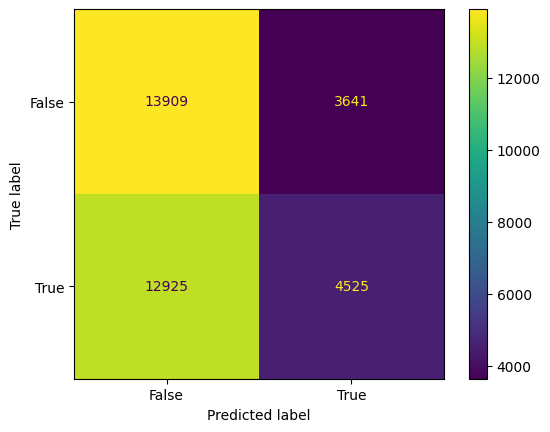

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Xtrain = [feat1(d) for d in dataTrain]
ytrain = [d['hours'] > median_hours for d in dataTrain]
Xtest = [feat1(d) for d in dataTest]
ytest = [d['hours'] > median_hours for d in dataTest]
mod = linear_model.LogisticRegression(C=1)
mod.fit(Xtrain,ytrain)
matrix = confusion_matrix(ytest, mod.predict(Xtest))
_ = ConfusionMatrixDisplay.from_estimator(mod, Xtest, ytest)

TN, FP, FN, TP = matrix.ravel()
BER = 0.5 * (FP/(FP+TN) + FN/(FN+TP))
print(TN, FP, FN, TP, BER)



In [168]:
answers['Q4'] = [TP.item(), TN.item(), FP.item(), FN.item(), BER.item()]

In [169]:
assertFloatList(answers['Q4'], 5)

In [ ]:
### Question 5

In [174]:
answers['Q5'] = [FP.item(), FN.item()]

In [175]:
assertFloatList(answers['Q5'], 2)

In [ ]:
### Question 6

In [ ]:
X2014 = []
y2014 = []
X2015plus = []
y2015plus = []
for d in dataTrain:
    if int(d['date'][:4]) <= 2014:
        X2014.append(feat1(d))
        y2014.append(d['hours'] > median_hours)
    else:
        X2015plus.append(feat1(d))
        y2015plus.append(d['hours'] > median_hours)

X2014test = []
y2014test = []
X2015plustest = []
y2015plustest = []

for d in dataTest:
    if int(d['date'][:4]) <= 2014:
        X2014test.append(feat1(d))
        y2014test.append(d['hours'] > median_hours)
    else:
        X2015plustest.append(feat1(d))
        y2015plustest.append(d['hours'] > median_hours)

# minset = min(len(X2014test), len(X2015plustest))


In [189]:
from sklearn.metrics import balanced_accuracy_score
def BER(predictions, y):
    return 1 - balanced_accuracy_score(y, predictions).item()

In [196]:
mod = linear_model.LogisticRegression(C=1)
mod.fit(X2014,y2014)
BER_A = BER(mod.predict(X2014test), y2014test)
mod2 = linear_model.LogisticRegression(C=1)
mod2.fit(X2015plus,y2015plus)
BER_B = BER(mod2.predict(X2015plustest), y2015plustest)
BER_C = BER(mod.predict(X2015plustest), y2015plustest)
BER_D = BER(mod2.predict(X2014test), y2014test)


In [197]:
print(BER_A, BER_B, BER_C, BER_D)

0.47996704709527416 0.47394608476712863 0.4820528229832485 0.4722496441821391


In [198]:
answers['Q6'] = [BER_A, BER_B, BER_C, BER_D]

In [199]:
assertFloatList(answers['Q6'], 4)

In [ ]:
### Question 7

In [201]:
def Jaccard(s1, s2):
    return len(s1.intersection(s2)) / len(s1.union(s2)) 

In [ ]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)

for d in dataTrain:
    user, item = d['userID'], d['gameID']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    reviewsPerUser[user].append(d)
    reviewsPerItem[item].append(d)

defaultdict(<class 'set'>, {'g35322304': {'u39566284', 'u63468748', 'u60034715', 'u69205212', 'u34396616', 'u17437051', 'u17535057', 'u82401519', 'u56506625', 'u55833077', 'u91022469', 'u17819244', 'u87645691', 'u35306726', 'u14766990', 'u04229254', 'u79662638', 'u81780378', 'u03242465', 'u95348276', 'u33809501', 'u44081559', 'u03403769', 'u69913976', 'u29378109', 'u33746646', 'u35434324', 'u12428190', 'u89568898', 'u65109925', 'u57510806', 'u93591744', 'u55714698', 'u45011836', 'u20805146', 'u96202002', 'u41048339', 'u82067921', 'u34716927', 'u86760789', 'u85327310', 'u64515483', 'u23462585', 'u00858975', 'u12982875', 'u68038246', 'u67384247', 'u49569747', 'u53816302', 'u97588174', 'u83803638', 'u71001988', 'u15010009', 'u01768310', 'u14023738', 'u47320919', 'u71056749', 'u12641896', 'u84759213', 'u91547889', 'u79566293', 'u54654852', 'u11697463', 'u22983731', 'u57078527', 'u24596409', 'u80039881', 'u14849287', 'u71532684', 'u79152764', 'u63098814', 'u17777056', 'u61576266', 'u8350366

In [217]:
jaccards = []
userset = set()
for d in dataTrain:
    userset.add(d['userID'])
firstPerson = itemsPerUser[dataTrain[0]['userID']]
for user in userset:
    if(user != dataTrain[0]['userID']):
        jaccards.append([Jaccard(itemsPerUser[user], firstPerson), user])

jaccards = sorted(jaccards, key=lambda x: x[0], reverse=True)
print(jaccards[:10])


[[0.10909090909090909, 'u36549785'], [0.09836065573770492, 'u56680455'], [0.09722222222222222, 'u47732229'], [0.09375, 'u18564530'], [0.09230769230769231, 'u29932810'], [0.08860759493670886, 'u87833081'], [0.08791208791208792, 'u58835174'], [0.08695652173913043, 'u02115872'], [0.08333333333333333, 'u73580608'], [0.08235294117647059, 'u71367785']]


In [224]:
answers['Q7'] = [jaccards[0][0], jaccards[9][0]]

In [225]:
assertFloatList(answers['Q7'], 2)

In [ ]:
### Question 8

In [294]:
hours_transformed = defaultdict()
for d in dataTrain:
    hours_transformed[d['userID'], d['gameID']] = d['hours_transformed']
hours_transformed_median = numpy.median([d['hours_transformed'] for d in dataTrain])

In [ ]:
hours_transformed

In [319]:
def predict_hours_transformed_by_user(user, item):
    top = 0
    bottom = 0
    users = usersPerItem[item]
    for v in users:
        if v == user: continue
        j = Jaccard(itemsPerUser[user], itemsPerUser[v])
        top += hours_transformed[v, item] * j
        bottom += j
    if not bottom:
        return hours_transformed_median
    return top / bottom


In [321]:
def predict_hours_transformed_by_item(user, item):
    top = 0
    bottom = 0
    items = itemsPerUser[user]
    for v in items:
        if v == item: continue
        j = Jaccard(usersPerItem[item], usersPerItem[v])
        top += hours_transformed[user, v] * j
        bottom += j
    if not bottom:
        return hours_transformed_median
    return top / bottom

In [322]:
MSEU = 0
for d in dataTest:
    user, item = d['userID'], d['gameID']
    pred = predict_hours_transformed_by_user(user, item)
    MSEU += (pred - d['hours_transformed'])**2
MSEU /= len(dataTest)

In [323]:
MSEI = 0
for d in dataTest:
    user, item = d['userID'], d['gameID']
    pred = predict_hours_transformed_by_item(user, item)
    MSEI += (pred - d['hours_transformed'])**2
MSEI /= len(dataTest)

In [325]:
print(MSEU, MSEI)

3.2807394793021567 4.914937229880424


In [326]:
answers['Q8'] = [MSEU.item(), MSEI.item()]

In [327]:
assertFloatList(answers['Q8'], 2)

In [ ]:
### Question 9

In [342]:
review_year = defaultdict()
for d in dataset:
    review_year[d['userID'], d['gameID']] = int(d['date'][:4])

In [343]:
def predict_hours_transformed_by_user2(user, item):
    top = 0
    bottom = 0
    users = usersPerItem[item]
    for v in users:
        if v == user: continue
        j = Jaccard(itemsPerUser[user], itemsPerUser[v])
        weight = math.exp(-abs(review_year[user, item] - review_year[v, item]))
        top += hours_transformed[v, item] * j * weight
        bottom += j * weight
    if not bottom:
        return hours_transformed_median
    return top / bottom

In [344]:
MSE9 = 0
for d in dataTest:
    user, item = d['userID'], d['gameID']
    pred = predict_hours_transformed_by_user2(user, item)
    MSE9 += (pred - d['hours_transformed'])**2
MSE9 /= len(dataTest)

In [345]:
answers['Q9'] = MSE9.item()

In [347]:
print(answers)

{'Q1': [0.0010422806169490823, 75735.70018272947], 'Q2': [75657.87688766664, 5249, 29751], 'Q3': [13058, 21942, 15941, 19059, 20808, 14192], 'Q4': [4525, 13909, 3641, 12925, 0.474076033273741], 'Q5': [3641, 12925], 'Q6': [0.47996704709527416, 0.47394608476712863, 0.4820528229832485, 0.4722496441821391], 'Q7': [0.10909090909090909, 0.08235294117647059], 'Q8': [3.2807394793021567, 4.914937229880424], 'Q9': 3.3096837262981116}


In [348]:
assertFloat(answers['Q9'])

In [349]:
if "float" in str(answers) or "int" in str(answers):
    print("it seems that some of your answers are not native python ints/floats;")
    print("the autograder will not be able to read your solution unless you convert them to ints/floats")

In [350]:
f = open("answers_midterm.txt", 'w')
f.write(str(answers) + '\n')
f.close()